In [42]:
import sqlite3
 

In [43]:
def run_query(query):
    result = None
    try:
        # Connect to DB and create a cursor
        sqlite_connection = sqlite3.connect('db.sqlite3')
        cursor = sqlite_connection.cursor()
        cursor.execute(query) 
        # Fetch and output result
        result = cursor.fetchall()
        # Close the cursor
        cursor.close()
        
    # Handle errors
    except sqlite3.Error as error:
        print('Error occurred - ', error)
 
    # Close DB Connection irrespective of success
    # or failure
    finally:
        if sqlite_connection:
            sqlite_connection.close()
    return result

In [48]:
query_1 = '''
    SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id
    '''
query_2 = '''
    SELECT
        avg(number_of_turns),
        name
    FROM
        ({})
    GROUP BY
        name
'''.format(query_1)

run_query(
    query_2
)

[(14.35, 'BiggestFirst'), (27.4555, 'Replacement'), (14.6405, 'Tunnels')]

In [70]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        id, name
    FROM
        db_player as player
    '''

players=run_query(
    query_1
)
def make_graph_for(player):
    id, name = player
    query_1 = '''
        SELECT
            count(turns.id) as number_of_turns
        FROM
            db_player as player
        JOIN 
            db_turn as turns ON turns.player_id = player.id
        WHERE player_id = {} 
        GROUP BY
            turns.game_id,
            turns.player_id
        
        '''.format(id)

    data=run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 5
    bin_edges = range(0, max(data) + bin_size, bin_size)

    # Create histogram
    plt.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    plt.title(name)
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')


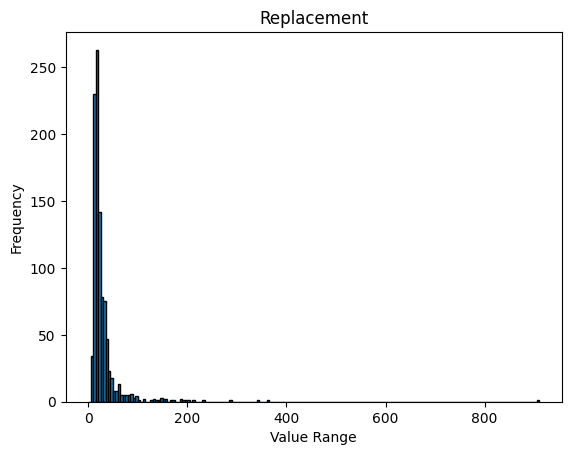

In [71]:
make_graph_for(players[0])

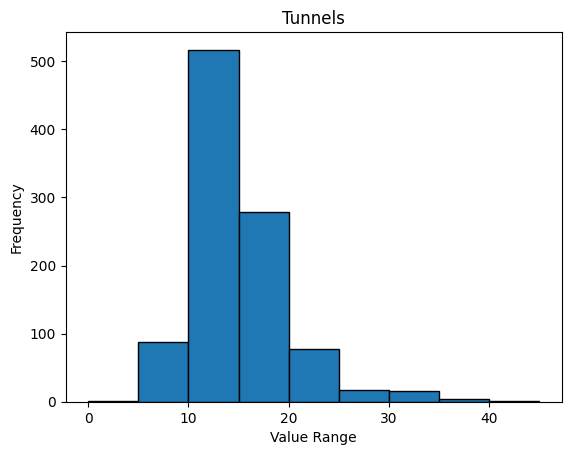

In [72]:
make_graph_for(players[1])

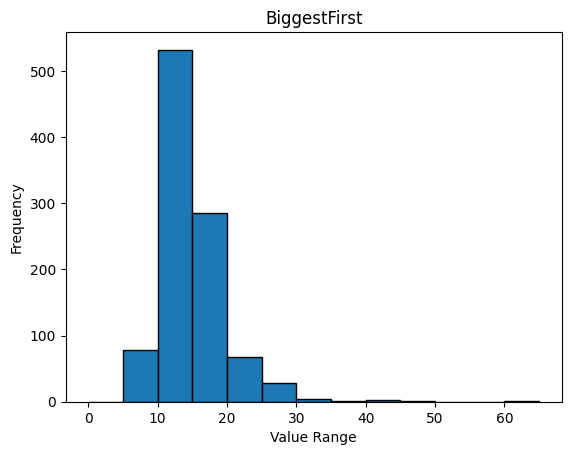

In [73]:
make_graph_for(players[2])

In [79]:
query_1 = '''
    SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
    '''
query_2 = '''
    SELECT
        avg(number_of_turns),
        name,
        type
    FROM
        ({})
    GROUP BY
        name,
        type
'''.format(query_1)

data = run_query(
    query_2
)



[(5.439879759519038, 'BiggestFirst', 'DISCARD'),
 (8.92992992992993, 'BiggestFirst', 'DRAW'),
 (26.452, 'Replacement', 'DISCARD'),
 (3.510236220472441, 'Replacement', 'NONE'),
 (5.388388388388388, 'Tunnels', 'DISCARD'),
 (9.083, 'Tunnels', 'DRAW')]

TypeError: bar() missing 1 required positional argument: 'height'